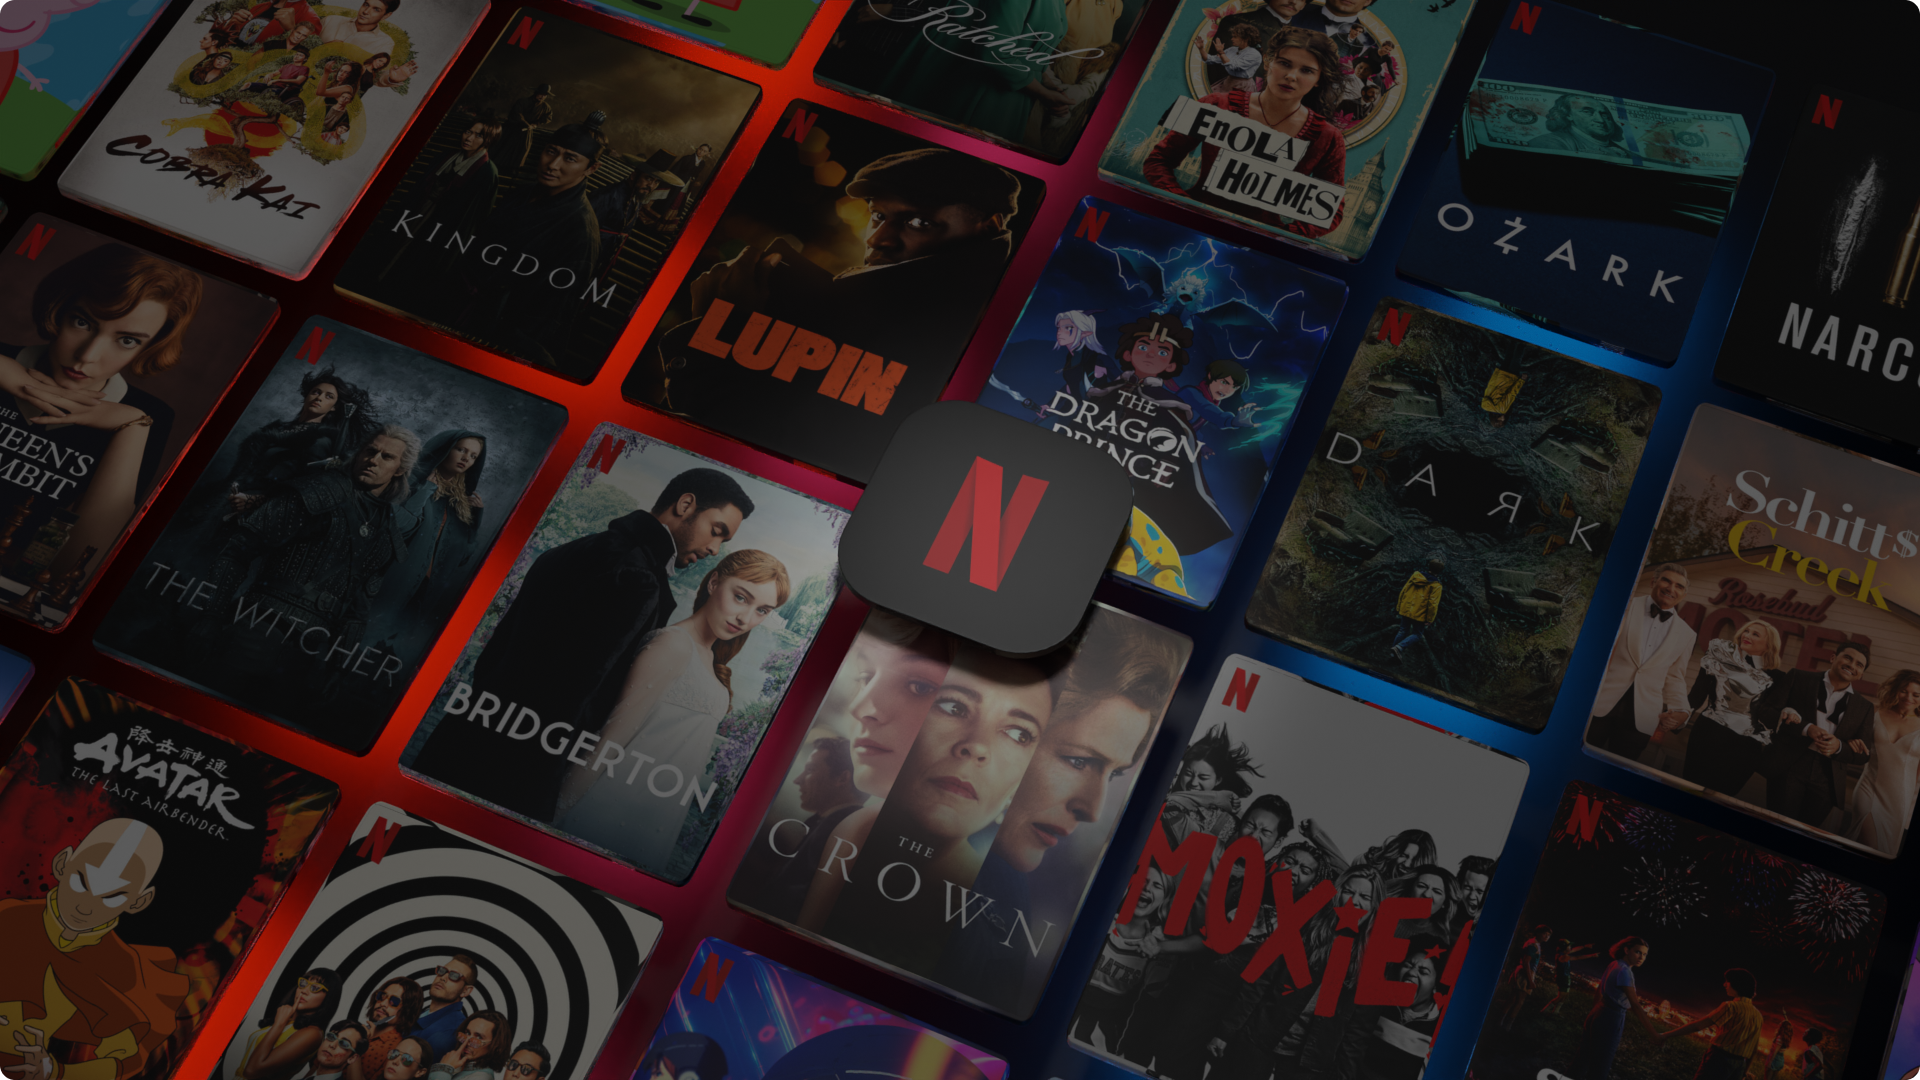

### Problem Identification:

The movie industry keep growing bigger day-by-day and media streaming platforms in a bid to ensure that their subscribers derive maximum satisfaction deviced a way to give the subscribers range of other related movies when they search for a particular movie on their potal. This also help content providers retain their subscriber-base as well as generate more revenue.

This project will be about developing a Content-based movie recommendation system that provide a user with fifteen(15) other related movies once the use searches for a particular movie.

A content-based recommendation system is a form of recommendation system where items are grouped based on having similar content. it uses technique such as the Cosine Similarity to determine the closeness of items.

The goal of this project is; based on subscriber's past movie search, a similar movies will be recommended using the movies' Type, Titles, Directors, Casts, Ratings, listed-in and Describtion. for instance if a subscriber searches for movie Title; 'Ganglands', similar other movies like 'Ganglands' will be desplayed to the subscriber.

The dataset used contained all tv shows and movies meta data on Netflix.

In [602]:
import pandas as pd

In [604]:
movie_dataset = pd.read_csv('https://github.com/CodexJoe/Projects/main/movie_recommendation_system/netflix_titles') # Loading dataset into program memory

### Data Exploration


In [531]:
movie_dataset.head() # Viewing the first ten rows of the dataset

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
1,s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",NaN,"September 24, 2021",2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...
3,s4,TV Show,Jailbirds New Orleans,NaN,NaN,NaN,"September 24, 2021",2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo..."
4,s5,TV Show,Kota Factory,NaN,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...


In [605]:
movie_dataset.tail() # Viewing the last 10 rows of the dataset

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
8802,s8803,Movie,Zodiac,David Fincher,"Mark Ruffalo, Jake Gyllenhaal, Robert Downey J...",United States,"November 20, 2019",2007,R,158 min,"Cult Movies, Dramas, Thrillers","A political cartoonist, a crime reporter and a..."
8803,s8804,TV Show,Zombie Dumb,NaN,NaN,NaN,"July 1, 2019",2018,TV-Y7,2 Seasons,"Kids' TV, Korean TV Shows, TV Comedies","While living alone in a spooky town, a young g..."
8804,s8805,Movie,Zombieland,Ruben Fleischer,"Jesse Eisenberg, Woody Harrelson, Emma Stone, ...",United States,"November 1, 2019",2009,R,88 min,"Comedies, Horror Movies",Looking to survive in a world taken over by zo...
8805,s8806,Movie,Zoom,Peter Hewitt,"Tim Allen, Courteney Cox, Chevy Chase, Kate Ma...",United States,"January 11, 2020",2006,PG,88 min,"Children & Family Movies, Comedies","Dragged from civilian life, a former superhero..."
8806,s8807,Movie,Zubaan,Mozez Singh,"Vicky Kaushal, Sarah-Jane Dias, Raaghav Chanan...",India,"March 2, 2019",2015,TV-14,111 min,"Dramas, International Movies, Music & Musicals",A scrappy but poor boy worms his way into a ty...


In [533]:
movie_dataset.info() #Viewing dataset information

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8807 entries, 0 to 8806
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   show_id       8807 non-null   object
 1   type          8807 non-null   object
 2   title         8807 non-null   object
 3   director      6173 non-null   object
 4   cast          7982 non-null   object
 5   country       7976 non-null   object
 6   date_added    8797 non-null   object
 7   release_year  8807 non-null   int64 
 8   rating        8803 non-null   object
 9   duration      8804 non-null   object
 10  listed_in     8807 non-null   object
 11  description   8807 non-null   object
dtypes: int64(1), object(11)
memory usage: 825.8+ KB


In [606]:
movie_dataset.shape # Displaying the shape of the dataset. We have 8807 rows with 12 columns

(8807, 12)

In [607]:
movie_dataset.nunique() #This displays the unique words in each columns

show_id         8807
type               2
title           8807
director        4528
cast            7692
country          748
date_added      1767
release_year      74
rating            17
duration         220
listed_in        514
description     8775
dtype: int64

In [608]:
movie_dataset.duplicated().sum() # Checking for any duplicate data

0

In [609]:
movie_dataset.isnull().sum() # Checking for null values

show_id            0
type               0
title              0
director        2634
cast             825
country          831
date_added        10
release_year       0
rating             4
duration           3
listed_in          0
description        0
dtype: int64

### Data Preprocessing

In [610]:
# Filling the Null values

movie_dataset['rating'] = movie_dataset['rating'].fillna(movie_dataset['rating'].mode()[0]) # Filling with mode since data is a categorical data
movie_dataset['duration'] = movie_dataset['duration'].fillna(movie_dataset['duration'].mode()[0])
movie_dataset['date_added'] = movie_dataset['date_added'].fillna(movie_dataset['date_added'].mode()[0])
movie_dataset['country'] = movie_dataset['country'].fillna(movie_dataset['country'].mode()[0])
movie_dataset['director'] = movie_dataset['director'].fillna('Unobtainable') # Replacing the null values with Unobtainable
movie_dataset['cast'] = movie_dataset['cast'].fillna('Unobtainable')

In [611]:
movie_dataset.isnull().sum() # Checking for null values again to confirm that changes have been applied successfully

show_id         0
type            0
title           0
director        0
cast            0
country         0
date_added      0
release_year    0
rating          0
duration        0
listed_in       0
description     0
dtype: int64

### Visualization

In [645]:
from matplotlib import pyplot as plt
import seaborn as sns
import numpy as np
from wordcloud import WordCloud

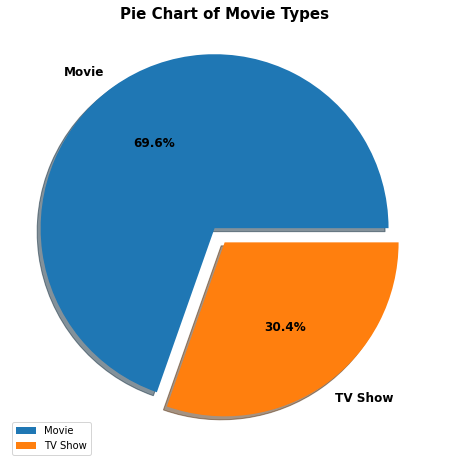

In [613]:
plt.figure(figsize = (10,8)) # create the size of the image as 10 by 8
plt.pie(movie_dataset['type'].value_counts(),
        labels = movie_dataset.type.unique(), autopct= '%.1f%%', shadow = True, 
        explode = (0.1, 0),
        textprops = {'size': 'large', 'fontweight': 'bold'}
       )
plt.legend()
plt.title('Pie Chart of Movie Types', fontsize = 15, fontweight = 'bold')
plt.show()

#### The pie chart shows that we have 69.6% of the movies in the dataset listed as Movies and 30.4% listed as TV Shows

Text(0.5, 1.0, 'Countplot of Movie Types')

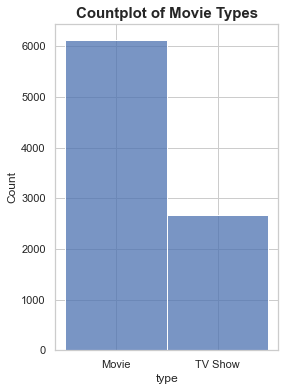

In [631]:
# Histogram for movie types
plt.figure(figsize = (4,6))
sns.histplot(x = movie_dataset['type']) # This counts the number of each unique words in a columns['type'] of the dataset

plt.title('Countplot of Movie Types', fontsize = 15, fontweight = 'bold')

Text(0.5, 1.0, 'RATINGS AND THEIR COUNTS')

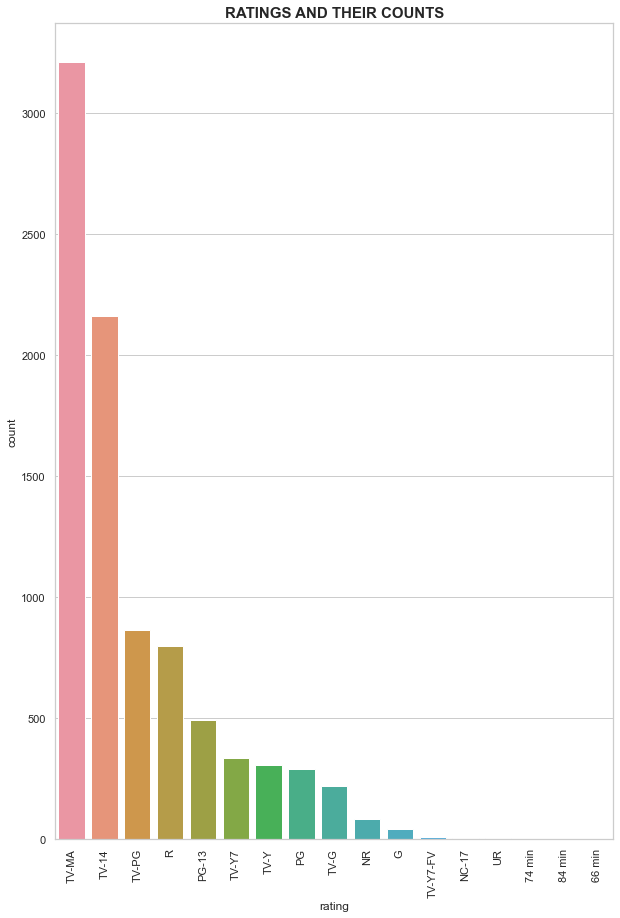

In [647]:
plt.figure(figsize =(10,15))
sns.set_theme(style="whitegrid")
sns.countplot(x = movie_dataset['rating'], order = movie_dataset['rating'].value_counts().index[0:17]
             )
ax= plt.xticks(rotation = 90)
plt.title('RATINGS AND THEIR COUNTS', fontsize = 15, fontweight = 'bold')


Text(0.5, 1.0, '25 COUNTRIES WITH HIGHEST RODUCTION')

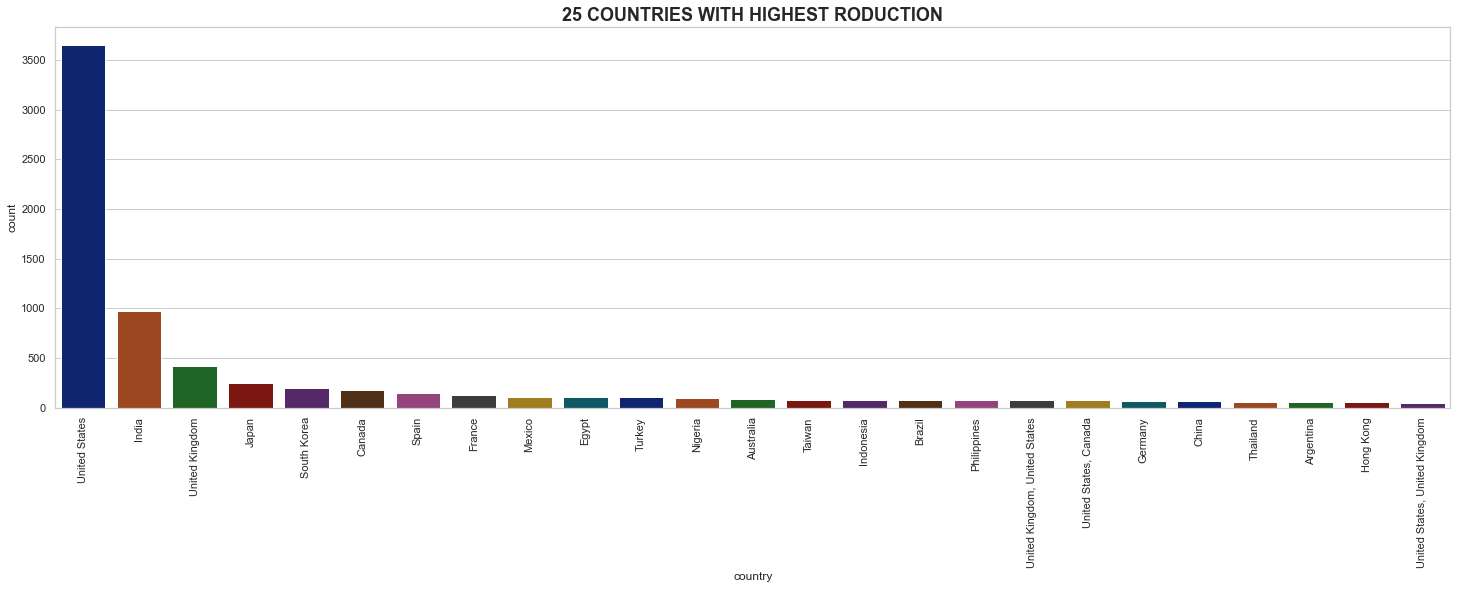

In [649]:
#Visualizing the top 25 movie producing countries 
plt.figure(figsize = (25,7))
sns.countplot(x = movie_dataset['country'], order = movie_dataset['country'].value_counts().index[0:25], palette="dark")
ax = plt.xticks(rotation = 90)
plt.title('25 COUNTRIES WITH HIGHEST RODUCTION', fontsize = 18, fontweight = 'bold')

Text(0.5, 1.0, '20 TOP MOST MOVIE PRODUCTION YEAR')

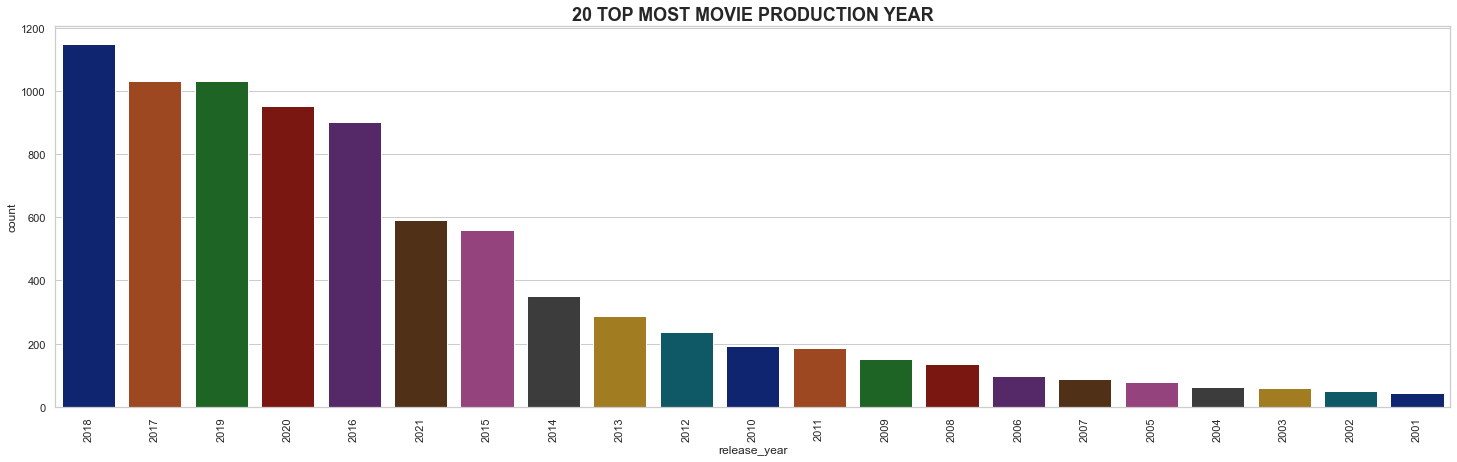

In [650]:
# Visualizing the top 20 release year
plt.figure(figsize = (25,7))
sns.countplot(x = movie_dataset['release_year'], order = movie_dataset['release_year'].value_counts().index[0:21], palette="dark")
ax = plt.xticks(rotation = 90)
plt.title('20 TOP MOST MOVIE PRODUCTION YEAR', fontsize = 18, fontweight = 'bold')

Text(0.5, 1.0, '25 TOP CATEGORIES')

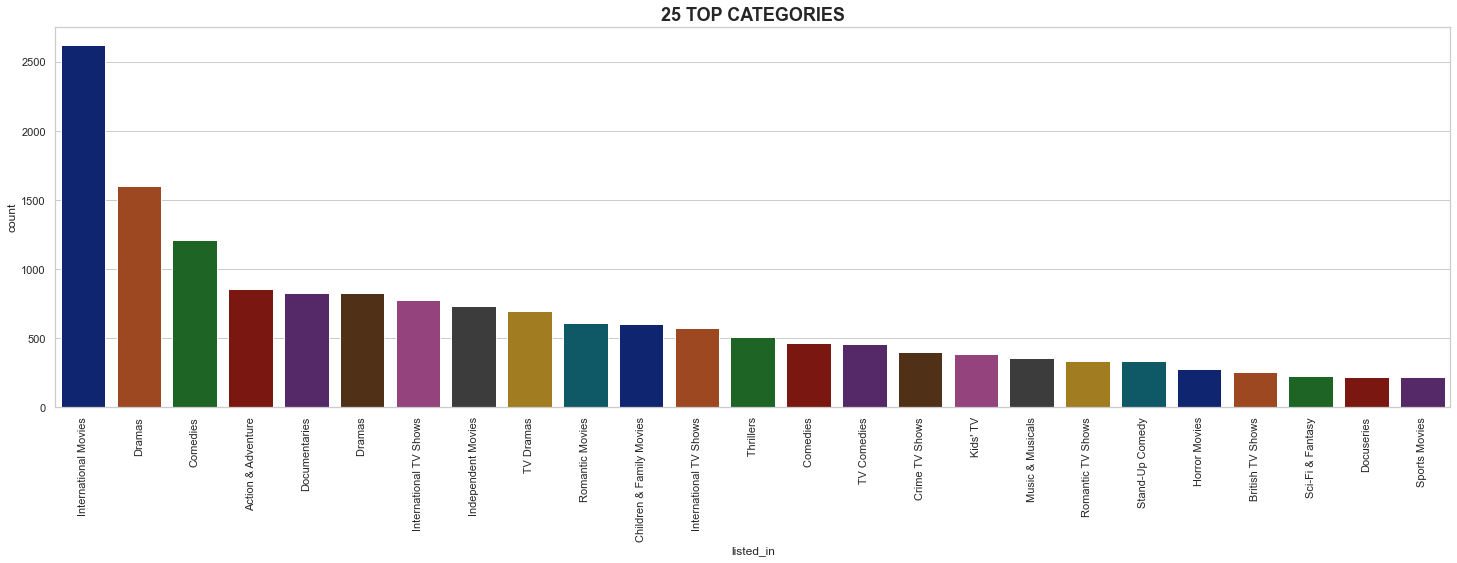

In [651]:
#Visualizing the Category of Movie
plt.figure(figsize = (25,7))
sns.countplot(x = movie_dataset['listed_in'].str.split(',').explode(), order = movie_dataset['listed_in'].str.split(',').explode().value_counts().index[0:25], palette="dark")
ax = plt.xticks(rotation = 90)
plt.title('25 TOP CATEGORIES', fontsize = 18, fontweight = 'bold')

In [643]:
#Months contents were added

months = pd.to_datetime(movie_dataset['date_added']).dt.month_name() # This formats the date column elements to yy-m-d then extracts the months

months.value_counts().sort_values(ascending = False)

July         827
December     813
September    770
April        764
October      760
August       755
January      748
March        742
June         728
November     705
May          632
February     563
Name: date_added, dtype: int64

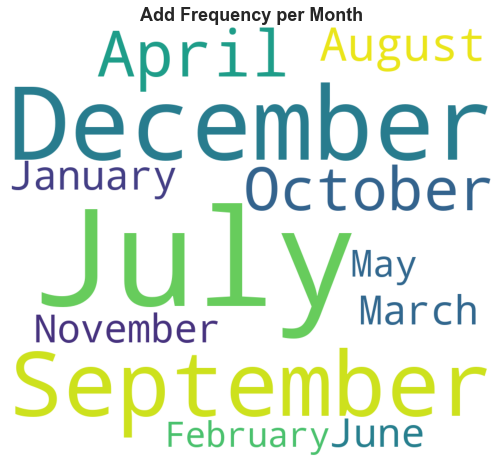

In [653]:
# Visualizing month in wordcloud

plt.figure(figsize=(9, 8))
wordcloud = WordCloud(width=900, height=800, background_color='white').generate_from_frequencies(months.value_counts())

plt.imshow(wordcloud)
plt.axis('off')
plt.title('Add Frequency per Month', fontsize = 18, fontweight = 'bold')
plt.show()


#### Contents were added the most in the month of July followed by December and the least in February

### Feature Selection

In [655]:
movies = movie_dataset.loc[:, ['title', 'type', 'director', 'cast', 'rating', 'listed_in', 'description']] # Columns to be used for recommendations

In [656]:
movies.head()

,title,type,director,cast,rating,listed_in,description
0,Dick Johnson Is Dead,Movie,Kirsten Johnson,Unobtainable,PG-13,Documentaries,"As her father nears the end of his life, filmm..."
1,Blood & Water,TV Show,Unobtainable,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",TV-MA,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."
2,Ganglands,TV Show,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",TV-MA,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...
3,Jailbirds New Orleans,TV Show,Unobtainable,Unobtainable,TV-MA,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo..."
4,Kota Factory,TV Show,Unobtainable,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",TV-MA,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...


In [657]:
movies.rating.unique() # Checking for errors in rating column

array(['PG-13', 'TV-MA', 'PG', 'TV-14', 'TV-PG', 'TV-Y', 'TV-Y7', 'R',
       'TV-G', 'G', 'NC-17', '74 min', '84 min', '66 min', 'NR',
       'TV-Y7-FV', 'UR'], dtype=object)

In [658]:
movies.shape

(8807, 7)

In [659]:
# Removing movies wrongly rated from the dataset
rating_error = ['74 min', '84 min', '66 min']

movies = movies[~movies['rating'].isin(rating_error)] # Taking everything but rating_error in rating column

In [660]:
movies.shape

(8804, 7)

In [661]:
movies.rating.unique()

array(['PG-13', 'TV-MA', 'PG', 'TV-14', 'TV-PG', 'TV-Y', 'TV-Y7', 'R',
       'TV-G', 'G', 'NC-17', 'NR', 'TV-Y7-FV', 'UR'], dtype=object)

### Feature engineering

In [662]:
# Removing the commas between actors' full names and extracting only the first three actors

movies['cast'] = movies['cast'].map(lambda x:x.split(',')[:3])

movies['listed_in'] = movies['listed_in'].map(lambda x:x.split(','))


In [663]:
movies['director'] = movies['director'].map(lambda x:x.split(' '))

movies['director']

0       [Kirsten, Johnson]
1           [Unobtainable]
2       [Julien, Leclercq]
3           [Unobtainable]
4           [Unobtainable]
               ...        
8802      [David, Fincher]
8803        [Unobtainable]
8804    [Ruben, Fleischer]
8805       [Peter, Hewitt]
8806        [Mozez, Singh]
Name: director, Length: 8804, dtype: object

In [664]:
movies['type'] = movies['type'].map(lambda x:x.split(' '))

movies['type']

0          [Movie]
1       [TV, Show]
2       [TV, Show]
3       [TV, Show]
4       [TV, Show]
           ...    
8802       [Movie]
8803    [TV, Show]
8804       [Movie]
8805       [Movie]
8806       [Movie]
Name: type, Length: 8804, dtype: object

In [665]:
movies['rating'] = movies['rating'].map(lambda x:x.split('-'))

movies['rating']

0       [PG, 13]
1       [TV, MA]
2       [TV, MA]
3       [TV, MA]
4       [TV, MA]
          ...   
8802         [R]
8803    [TV, Y7]
8804         [R]
8805        [PG]
8806    [TV, 14]
Name: rating, Length: 8804, dtype: object

In [666]:
movies.head()

,title,type,director,cast,rating,listed_in,description
0,Dick Johnson Is Dead,[Movie],"[Kirsten, Johnson]",[Unobtainable],"[PG, 13]",[Documentaries],"As her father nears the end of his life, filmm..."
1,Blood & Water,"[TV, Show]",[Unobtainable],"[Ama Qamata, Khosi Ngema, Gail Mabalane]","[TV, MA]","[International TV Shows, TV Dramas, TV Myste...","After crossing paths at a party, a Cape Town t..."
2,Ganglands,"[TV, Show]","[Julien, Leclercq]","[Sami Bouajila, Tracy Gotoas, Samuel Jouy]","[TV, MA]","[Crime TV Shows, International TV Shows, TV ...",To protect his family from a powerful drug lor...
3,Jailbirds New Orleans,"[TV, Show]",[Unobtainable],[Unobtainable],"[TV, MA]","[Docuseries, Reality TV]","Feuds, flirtations and toilet talk go down amo..."
4,Kota Factory,"[TV, Show]",[Unobtainable],"[Mayur More, Jitendra Kumar, Ranjan Raj]","[TV, MA]","[International TV Shows, Romantic TV Shows, ...",In a city of coaching centers known to train I...


In [667]:
# Converting all the features to lowercase and concertinating where necessary

for index, row in movies.iterrows():
    row['cast'] = [x.lower().replace(' ','') for x in row['cast']] # replace(' ','') is used to remove spaces where items are separated by ,
    row['cast'] = [x.replace('-','') for x in row['cast']] # remove - where items are separated by comma
    row['cast'] = [x.replace('.','') for x in row['cast']]
    row['listed_in'] = [x.lower().replace(' ','') for x in row['listed_in']]
    row['director'] = ''.join(row['director']).lower()
    row['type'] = ''.join(row['type']).lower()
    row['rating'] = ''.join(row['rating']).lower()
    row['title'] = (row['title']).lower()
    




In [668]:
 movies.head()

,title,type,director,cast,rating,listed_in,description
0,dick johnson is dead,movie,kirstenjohnson,[unobtainable],pg13,[documentaries],"As her father nears the end of his life, filmm..."
1,blood & water,tvshow,unobtainable,"[amaqamata, khosingema, gailmabalane]",tvma,"[internationaltvshows, tvdramas, tvmysteries]","After crossing paths at a party, a Cape Town t..."
2,ganglands,tvshow,julienleclercq,"[samibouajila, tracygotoas, samueljouy]",tvma,"[crimetvshows, internationaltvshows, tvaction&...",To protect his family from a powerful drug lor...
3,jailbirds new orleans,tvshow,unobtainable,[unobtainable],tvma,"[docuseries, realitytv]","Feuds, flirtations and toilet talk go down amo..."
4,kota factory,tvshow,unobtainable,"[mayurmore, jitendrakumar, ranjanraj]",tvma,"[internationaltvshows, romantictvshows, tvcome...",In a city of coaching centers known to train I...


In [669]:
movies.tail()

,title,type,director,cast,rating,listed_in,description
8802,zodiac,movie,davidfincher,"[markruffalo, jakegyllenhaal, robertdowneyjr]",r,"[cultmovies, dramas, thrillers]","A political cartoonist, a crime reporter and a..."
8803,zombie dumb,tvshow,unobtainable,[unobtainable],tvy7,"[kids'tv, koreantvshows, tvcomedies]","While living alone in a spooky town, a young g..."
8804,zombieland,movie,rubenfleischer,"[jesseeisenberg, woodyharrelson, emmastone]",r,"[comedies, horrormovies]",Looking to survive in a world taken over by zo...
8805,zoom,movie,peterhewitt,"[timallen, courteneycox, chevychase]",pg,"[children&familymovies, comedies]","Dragged from civilian life, a former superhero..."
8806,zubaan,movie,mozezsingh,"[vickykaushal, sarahjanedias, raaghavchanana]",tv14,"[dramas, internationalmovies, music&musicals]",A scrappy but poor boy worms his way into a ty...


### Building the aglorithm

In [584]:
# !pip install rake_nltk


In [583]:
import rake_nltk
from rake_nltk import Rake
import nltk
#nltk.download('stopwords')
#nltk.download('punkt')
from sklearn.metrics.pairwise import cosine_similarity
from sklearn.feature_extraction.text import CountVectorizer
import warnings
warnings.filterwarnings('ignore')



In [670]:
# Extracting keywords from the movie description column

movies['key_words'] = '' #creating an extra column to hold the keywords

for index, row in movies.iterrows():
    description = row['description'] # getting all the rows in description column

    # Rake(): Stands for Rapid Automatic Keyword Extraction is used to extract key word, it uses english stopwords from NLTK
    # and discard all puntuation characters

    r = Rake() # defining an instance of rack
    r.extract_keywords_from_text(description) # extracting the words by passing the column that contained the text
    key_words_degree = r.get_word_degrees() #getting dictionary with key words and their score
    row['key_words'] = list(key_words_degree.keys()) # putting the key words to the new column


In [671]:
movies.head()

,title,type,director,cast,rating,listed_in,description,key_words
0,dick johnson is dead,movie,kirstenjohnson,[unobtainable],pg13,[documentaries],"As her father nears the end of his life, filmm...","[father, nears, end, life, filmmaker, kirsten,..."
1,blood & water,tvshow,unobtainable,"[amaqamata, khosingema, gailmabalane]",tvma,"[internationaltvshows, tvdramas, tvmysteries]","After crossing paths at a party, a Cape Town t...","[crossing, paths, party, cape, town, teen, set..."
2,ganglands,tvshow,julienleclercq,"[samibouajila, tracygotoas, samueljouy]",tvma,"[crimetvshows, internationaltvshows, tvaction&...",To protect his family from a powerful drug lor...,"[protect, family, powerful, drug, lord, skille..."
3,jailbirds new orleans,tvshow,unobtainable,[unobtainable],tvma,"[docuseries, realitytv]","Feuds, flirtations and toilet talk go down amo...","[feuds, flirtations, toilet, talk, go, among, ..."
4,kota factory,tvshow,unobtainable,"[mayurmore, jitendrakumar, ranjanraj]",tvma,"[internationaltvshows, romantictvshows, tvcome...",In a city of coaching centers known to train I...,"[city, coaching, centers, known, train, india,..."


In [672]:
movies.set_index('title', inplace = True) # setting title as index
movies.drop(columns = ['description'], inplace = True) # dropping description column since we have keywords column now
movies.head()

,type,director,cast,rating,listed_in,key_words
title,,,,,,
dick johnson is dead,movie,kirstenjohnson,[unobtainable],pg13,[documentaries],"[father, nears, end, life, filmmaker, kirsten,..."
blood & water,tvshow,unobtainable,"[amaqamata, khosingema, gailmabalane]",tvma,"[internationaltvshows, tvdramas, tvmysteries]","[crossing, paths, party, cape, town, teen, set..."
ganglands,tvshow,julienleclercq,"[samibouajila, tracygotoas, samueljouy]",tvma,"[crimetvshows, internationaltvshows, tvaction&...","[protect, family, powerful, drug, lord, skille..."
jailbirds new orleans,tvshow,unobtainable,[unobtainable],tvma,"[docuseries, realitytv]","[feuds, flirtations, toilet, talk, go, among, ..."
kota factory,tvshow,unobtainable,"[mayurmore, jitendrakumar, ranjanraj]",tvma,"[internationaltvshows, romantictvshows, tvcome...","[city, coaching, centers, known, train, india,..."


In [673]:
key_words_degree

defaultdict(<function rake_nltk.rake.Rake._build_word_co_occurance_graph.<locals>.<lambda>()>,
            {'scrappy': 1,
             'poor': 3,
             'boy': 3,
             'worms': 3,
             'way': 1,
             'tycoon': 1,
             'dysfunctional': 2,
             'family': 2,
             'facing': 1,
             'fear': 1,
             'music': 1,
             'truth': 1,
             'past': 1})

In [674]:
movies.shape

(8804, 6)

In [675]:
movies['bag_of_words'] = '' # This will contain all the words in all columns joined together
columns = movies.columns

for index, row in movies.iterrows():
    
    words = ''
   
    for col in columns:
        
        if col != 'type' and col != 'director' and col != 'rating':
            words = words + ' '.join(row[col])+' '
        else:
            words = words + row[col]+ ' '
            
    row['bag_of_words'] = words

    
    

In [676]:
movies.head()

,type,director,cast,rating,listed_in,key_words,bag_of_words
title,,,,,,,
dick johnson is dead,movie,kirstenjohnson,[unobtainable],pg13,[documentaries],"[father, nears, end, life, filmmaker, kirsten,...",movie kirstenjohnson unobtainable pg13 documen...
blood & water,tvshow,unobtainable,"[amaqamata, khosingema, gailmabalane]",tvma,"[internationaltvshows, tvdramas, tvmysteries]","[crossing, paths, party, cape, town, teen, set...",tvshow unobtainable amaqamata khosingema gailm...
ganglands,tvshow,julienleclercq,"[samibouajila, tracygotoas, samueljouy]",tvma,"[crimetvshows, internationaltvshows, tvaction&...","[protect, family, powerful, drug, lord, skille...",tvshow julienleclercq samibouajila tracygotoas...
jailbirds new orleans,tvshow,unobtainable,[unobtainable],tvma,"[docuseries, realitytv]","[feuds, flirtations, toilet, talk, go, among, ...",tvshow unobtainable unobtainable tvma docuseri...
kota factory,tvshow,unobtainable,"[mayurmore, jitendrakumar, ranjanraj]",tvma,"[internationaltvshows, romantictvshows, tvcome...","[city, coaching, centers, known, train, india,...",tvshow unobtainable mayurmore jitendrakumar ra...


In [677]:
# Dropping all other columns but bag_of_words column

movies.drop(columns = [col for col in movies.columns if col != 'bag_of_words'], inplace = True)

In [678]:
movies['bag_of_words'][45]

'movie tylergreco unobtainable pg documentaries robin wiltshire painful childhood rescued westerns lives frontier dreams training horses loves big screen  '

### Count Vectorizer 
This is used to count how many time(s) each word appears in each bag_of_words columnn

In [679]:
cv = CountVectorizer() # Instantiating the countvectorizer object
cv_matrix = cv.fit_transform(movies['bag_of_words'])

In [680]:
cv_matrix

<8804x37406 sparse matrix of type '<class 'numpy.int64'>'
	with 200451 stored elements in Compressed Sparse Row format>

In [681]:
c = cv_matrix.todense()

In [682]:
c

matrix([[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]], dtype=int64)

In [683]:
cv_matrix.shape

(8804, 37406)

### Cosine Simiarity

This is a distance measure like Euclidean distance. However, whilst Euclidean distance measures the distance between items, Cosine Similarity measures the similarity between items. Cosine similarity is a dot product of the data points (Cosine Similarity = {(X.Y)/(Sum(X2).Sum(Y2))} )

The higher the Cosine Similarity, the close the items are to each other or the stronger the similarity of the items.


In [690]:
c_sim = cosine_similarity(cv_matrix, cv_matrix)
c_sim[10] # printing the 5th index of the cosine similarity maritx generated

array([0.09534626, 0.21320072, 0.1672484 , ..., 0.        , 0.        ,
       0.        ])

In [716]:
indice = pd.Series(movies.index) # Creating indices for each movie title
indice[:10]

0                dick johnson is dead
1                       blood & water
2                           ganglands
3               jailbirds new orleans
4                        kota factory
5                       midnight mass
6    my little pony: a new generation
7                             sankofa
8       the great british baking show
9                        the starling
Name: title, dtype: object

### The recommendation Function

This function will take the move title and returns the top 15 recommended movies based on their similarity.

In [732]:
# def recommendation(movie_name):
#     recommended_movies = [] # This will contain the list of recommended movies
    
#     try:
#         ind = indice[indice == movie_name].index[0] # This line gets the name from the user and assigns the corresponding index number to it
    
#     except:
#         print('Sorry! Movie not Listed') # executes if the movie name is not found 
    
#     else:
#         c_sim_series = pd.Series(c_sim[ind]).sort_values(ascending = False) # Using the fatched movie index number to sort its corresponding cosine similarity matrix in decending order
#         top_15 = list(c_sim_series.iloc[1:16].index) # Fatches the top 15 highest cosine similarity
# #     print(top_15)
    
#         for i in top_15:
#             y = movie_dataset[]
            
# #             recommended_movies.append(list(movies.index)[i]) # appending the movie names
# #             recommended_movies.append((movies.index)[i])
            
        
#         return 'Similar Other Movies Avaliable Are Listed Below: ', recommended_movies
            
# movie_name = (input('Search for Movie: ' )).lower()

# recommendation(movie_name)
    
def recommendation(movie_name):
    try:
        ind = indice[indice == movie_name].index[0] # This line gets the name from the user and assigns the corresponding index number to it
    
    except:
        print('Sorry! Movie not Listed') # executes if the movie name is not found 
    
    else:
        c_sim_series = list(enumerate(c_sim[ind]))
        c_sim_series = sorted(c_sim_series, key = lambda x:x[1], reverse = True)
        top_15 = c_sim_series[1:16]
#         print(top_15)
        recommended_movies = [i[0] for i in top_15]
        return movie_dataset[['title', 'description']].iloc[recommended_movies]
    
        
movie_name = (input('Search for Movie: ' )).lower()

recommendation(movie_name)
        
        
        
    

        

Search for Movie: Ganglands


,title,description
5305,Narcos,The true story of Colombia's infamously violen...
734,Lupin,"Inspired by the adventures of Arsène Lupin, ge..."
3976,The Eagle of El-Se'eed,A police officer and a drug lord become embroi...
6738,Fanatic,When a successful young rap star has an affair...
543,Undercover,Undercover agents infiltrate a drug kingpin's ...
2921,Narcos: Mexico,Witness the birth of the Mexican drug war in t...
4750,El Chapo,This drama series chronicles the true story of...
4178,Marvel's The Punisher,A former Marine out to punish the criminals re...
4853,Mob Psycho 100,There's an organization gathering espers for a...
749,L.A.’s Finest,"In this spinoff of the ""Bad Boys"" franchise, t..."


### Summary

Movie titled Narcos is the closest to Ganglands.  This is means that users that have watched Ganglands will strongly love to watch Narcos too.

### Thank you and God bless you!